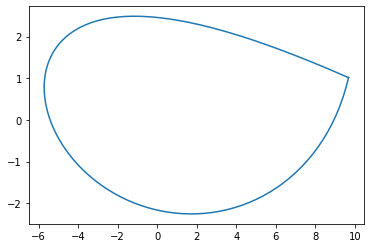

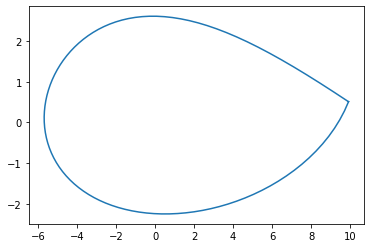

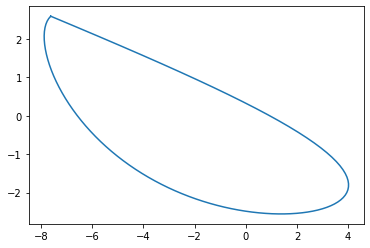

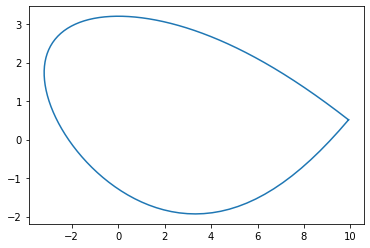

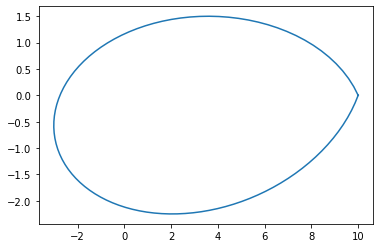

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
import math 
import os 
import cmath 
import skimage
import sklearn 
from skimage import measure, io 
from PIL import Image
from math import factorial as fac
from numpy import sin, cos, sinh, cosh,arcsin,arccos, pi, exp, abs, max,min, sinh, cosh
from scipy.spatial import Voronoi, voronoi_plot_2d, distance
from scipy.interpolate import interp1d
from sklearn.decomposition import PCA

def Choose(n,k): 
    return  fac(n)/ fac(k) / fac( n - k )

class nBezier(object):
    def __init__(self, points):
        self.points = np.array(points).astype(np.float32)

    def at(self, t):
        pt = 0 
        n= len(self.points)
        for k in range(n): 
            pt +=  Choose(n-1,k) * (1-t)**(n-1-k) * t**k * self.points[k]
        return pt

# Create initial ellipse     
t = 50
alpha = np.linspace(0, 2*pi, t) 
r1 = 10
r2 = 4
x = r1*cos(alpha)
y = r2*sin(alpha)
#plt.plot(x,y)


sample_num = 5
samples = [] 
param_num = 100
# Random number of pts
for i in range(sample_num): 
    num = random.randint(6,10)
    ran =  sorted(random.sample(range(t), num), key=int)

    con_pts = np.array([x[ran],y[ran]]).T

    # List of points based on the random parameters 

    con_pts = np.vstack([con_pts, con_pts[0]])

    Curve  = nBezier(con_pts)

    t_arr = np.linspace(0,1,param_num) 

    list_of_pts = []
    
    for  item in t_arr:
        list_of_pts.append(Curve.at(item))

    pts = np.array(list_of_pts)
    
    plt.plot(pts[:,0],pts[:,1])
    plt.show()
    samples.append(pts)

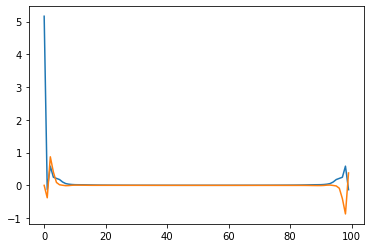

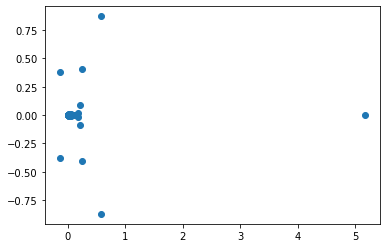

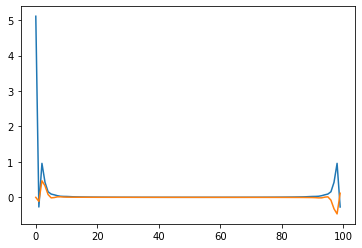

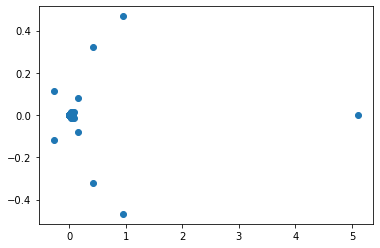

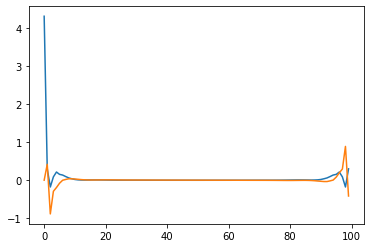

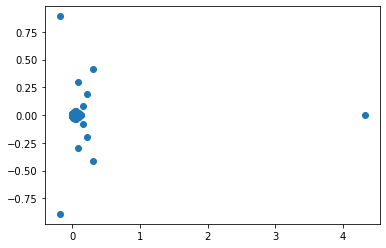

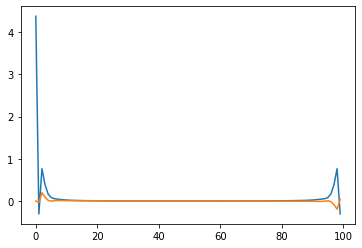

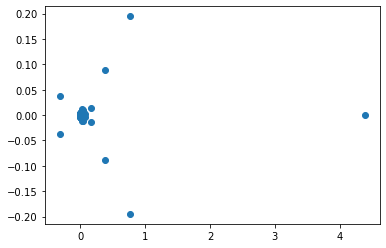

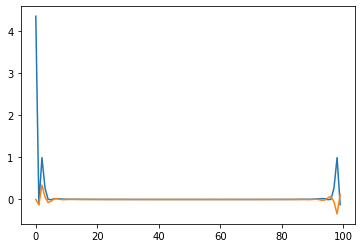

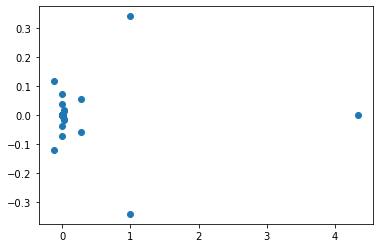

In [7]:
#pts2 =pts[:-1, :]
coeffs = []
for i in range(sample_num): 
    pts2 =samples[i]
    sum_coordinaes = 0 
    area = 0 
    x_g = 0 
    y_g = 0

    for i in range(pts2.shape[0]-1):
        area += (pts2[i,0]*pts2[i+1,1] - pts2[i+1,0]*pts2[i,1])
        x_g += (pts2[i,0]+pts2[i+1,0])*(pts2[i,0]*pts2[i+1,1] - pts2[i+1,0]*pts2[i,1])
        y_g += (pts2[i,1]+pts2[i+1,1])*(pts2[i,0]*pts2[i+1,1] - pts2[i+1,0]*pts2[i,1])

    x_g = x_g/(3*area)
    y_g = y_g/(3*area)

    r_dist = ( (pts2[:,0] - x_g)**2 + (pts2[:,1] - y_g)**2)**0.5
    #plt.plot(r_dist)
    #plt.show()
    # Fourier Transform
    coeff = np.fft.fft(r_dist)/r_dist.shape[0]
    nlist = np.arange(0,r_dist.shape[0])
    plt.plot(coeff.real)
    plt.plot(coeff.imag)
    plt.show()
    #plt.scatter(coeff.real, coeff.imag)
    #plt.plot_surface(X, Y, Multiple_arrays[i],cmap=cm.coolwarm)
    plt.show()
    coeff = abs(coeff)
    coeff =  np.hstack([coeff[int(param_num/2):param_num], coeff[0:int(param_num/2)]])
    coeff = coeff/max(coeff)
    coeffs.append(coeff)
    #plt.plot(coeff)
    #plt.show()
    
    # Freqmap instead 

In [4]:
print(coeff.shape)

(100,)


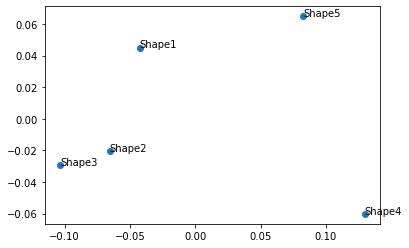

In [11]:
# Apply PCA 
X_PCA = np.array(coeffs)

pca = PCA(n_components=2)
pca.fit(X_PCA)
X_pca = pca.transform(X_PCA)

plt.scatter(X_pca[:,0], X_pca[:,1])
for i in range(X_pca.shape[0]): 
    plt.annotate('Shape'+str(i+1), xy = X_pca[i,:])
    